# Visión computacional con YOLO

### HackCIMAT - 2023
------

*Por: [Gabriel Missael Barco](https://github.com/GabrielMissael)*


In [ ]:
# Si estás en Collaboratory, puedes usar el siguiente código para instalar las dependencias:
# !pip install ultralytics

In [104]:
import ultralytics
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import urlliba

ultralytics.checks()

%matplotlib inline

Ultralytics YOLOv8.0.45 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
Setup complete ✅ (16 CPUs, 7.4 GB RAM, 133.3/250.9 GB disk)


In [116]:
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

model_output = model("https://ultralytics.com/images/bus.jpg")[0]  # predict on an image

results = model_output.boxes.boxes.cpu().numpy()
results

Ultralytics YOLOv8.0.45 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /home/missa/projects/HackCIMAT/CV_YOLO_workshop/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 30.0ms
Speed: 2.5ms preprocess, 30.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


array([[         17,         231,         802,         768,     0.87042,           5],
       [         49,         399,         245,         903,     0.86905,           0],
       [        670,         380,         810,         876,     0.85362,           0],
       [        221,         406,         345,         857,     0.81936,           0],
       [          0,         255,          32,         325,     0.34633,          11],
       [          0,         551,          67,         874,     0.30106,           0]], dtype=float32)

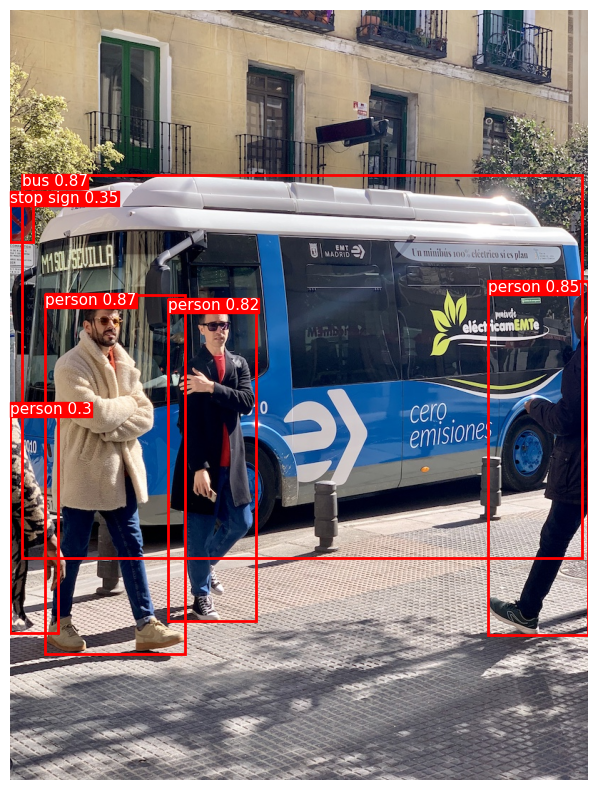

In [114]:
img = np.array(PIL.Image.open(urllib.request.urlopen("https://ultralytics.com/images/bus.jpg")))
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img)

# Plot boxes
for result in results:
    # Draw square
    ax.add_patch(plt.Rectangle((result[0], result[1]),
        result[2] - result[0],
        result[3] - result[1],
        fill=False,
        edgecolor='red',
        linewidth=2))

    # Get name
    name = model_output.names[int(result[5])]

    # Draw label
    ax.text(result[0], result[1] - 2,
        s=str(name) + ' ' + str(round(result[4], 2)),
        color='white',
        verticalalignment='top',
        bbox={'color': 'red', 'pad': 0})

#Remove axes
ax.axis('off')
plt.show()


In [117]:
def bounding_boxes(img):
    model = YOLO("yolov8n.pt")

    model_output = model(img)[0]

    results = model_output.boxes.boxes.cpu().numpy()

    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img)

    # Plot boxes
    for result in results:
        # Draw square
        ax.add_patch(plt.Rectangle((result[0], result[1]),
            result[2] - result[0],
            result[3] - result[1],
            fill=False,
            edgecolor='red',
            linewidth=2))

        # Get name
        name = model_output.names[int(result[5])]

        # Draw label
        ax.text(result[0], result[1] - 2,
            s=str(name) + ' ' + str(round(result[4], 2)),
            color='white',
            verticalalignment='top',
            bbox={'color': 'red', 'pad': 0})

    #Remove axes
    ax.axis('off')

    return fig


Ultralytics YOLOv8.0.45 🚀 Python-3.8.10 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

0: 384x640 2 persons, 3 bottles, 2 cups, 4 chairs, 1 dining table, 26.2ms
Speed: 2.1ms preprocess, 26.2ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


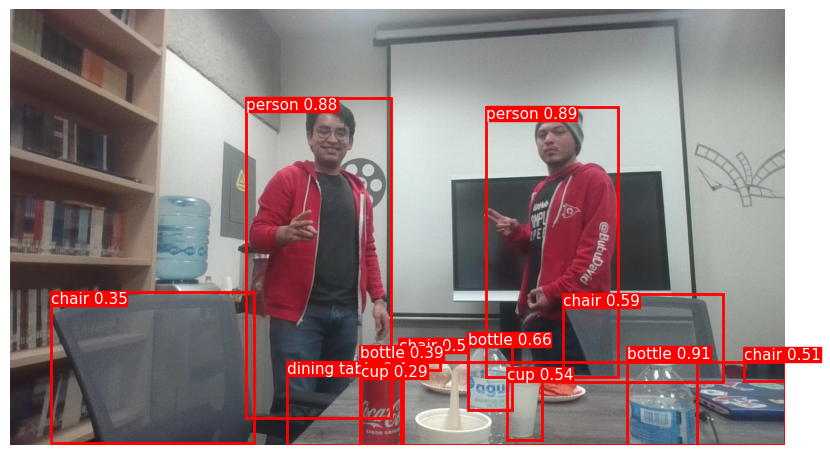

In [124]:
img = plt.imread('examples/CE.jpg')

# Si estas en Colab, comenta la linea anterior y descomenta la siguiente
# img = np.array(PIL.Image.open(urllib.request.urlopen("https://i.imgur.com/ptEinAD.jpg")))

bounding_boxes(img)

plt.show()